Trying out different values of dropout, batch size, lookback and other parameters. Best val loss = 0.12

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from itertools import chain
from keras.preprocessing.sequence import TimeseriesGenerator
from matplotlib import pyplot as plt
from tensorflow.keras import layers
df = pd.read_csv("drive/MyDrive/Engineer's Project/test.csv")

In [ ]:
df.pop('Date')
float_data = np.array(df).astype('float32')
mean = float_data[:2500].mean(axis=0)
float_data -= mean
std = float_data[:2500].std(axis=0)
float_data /= std

In [ ]:
df.pop('usa_cpi')
df.pop('pol_cpi')
df.pop('usa_inter')
df.pop('pol_inter')

0       5.82
1       5.82
2       5.82
3       5.82
4       5.82
        ... 
3537    4.83
3538    4.83
3539    4.83
3540    4.83
3541    4.83
Name: pol_inter, Length: 3542, dtype: float64

In [ ]:
lookback = 15
step = 1
delay = 0
min_index  = 0
max_index = 2500
#max_index  = 3541
batch_size = 256

In [ ]:
def generator(data, lookback, delay, min_index, max_index,shuffle=False, batch_size=128, step=1):
  if max_index is None:
    max_index = len(data) - delay - 1
  i = min_index + lookback
  while 1:
    if shuffle:
      rows = np.random.randint(
        min_index + lookback, max_index, size=batch_size)
    else:
      if i + batch_size >= max_index:
        i = min_index + lookback
      rows = np.arange(i, min(i + batch_size, max_index))
      i += len(rows)
    samples = np.zeros((len(rows),lookback // step,data.shape[-1]))
    targets = np.zeros((len(rows),))
    for j, row in enumerate(rows):
      indices = range(rows[j] - lookback, rows[j], step)
      samples[j] = data[indices]
      targets[j] = data[rows[j] + delay][3]
    yield samples, targets

In [ ]:
train_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=0,
max_index=2500,
#max_index=3541,
shuffle=True,
step=step,
batch_size=batch_size)

In [ ]:
val_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=2501,
max_index=3000,
step=step,
batch_size=batch_size)

In [ ]:
test_gen = generator(float_data,
lookback=lookback,
delay=delay,
min_index=3001,
max_index=3541,
step=step,
batch_size=batch_size)

In [ ]:
val_steps = (3000 - 2501 - lookback)
test_steps = (len(float_data) - 3001 - lookback)

In [ ]:
train_steps = 2500-lookback

Model 1 - model with 256 LSTM

In [ ]:
model1 = tf.keras.models.Sequential()
model1.add(layers.LSTM(256,
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model1.add(layers.Dense(1))
model1.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history1 = model1.fit(train_gen,
  steps_per_epoch=200,
  epochs=50,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/50
200/200 [==============================] - 93s 450ms/step - loss: 0.0991 - val_loss: 0.1239
Epoch 2/50
200/200 [==============================] - 87s 435ms/step - loss: 0.0722 - val_loss: 0.0657
Epoch 3/50
200/200 [==============================] - 89s 445ms/step - loss: 0.0649 - val_loss: 0.0541
Epoch 4/50
200/200 [==============================] - 87s 436ms/step - loss: 0.0594 - val_loss: 0.0837
Epoch 5/50
200/200 [==============================] - 87s 438ms/step - loss: 0.0558 - val_loss: 0.0731
Epoch 6/50
200/200 [==============================] - 89s 445ms/step - loss: 0.0531 - val_loss: 0.0540
Epoch 7/50
200/200 [==============================] - 87s 436ms/step - loss: 0.0506 - val_loss: 0.0562
Epoch 8/50
200/200 [==============================] - 87s 436ms/step - loss: 0.0486 - val_loss: 0.0935
Epoch 9/50
200/200 [==============================] - 89s 445ms/step - loss: 0.0471 - val_loss: 0.1000
Epoch 10/50
200/200 [==============================] - 87s 437ms/step - l

In [ ]:
eval1 = model1.evaluate(val_gen, steps = val_steps)
eval1 *std[3]

484/484 [==============================] - 51s 105ms/step - loss: 0.1169


0.043659573266059626

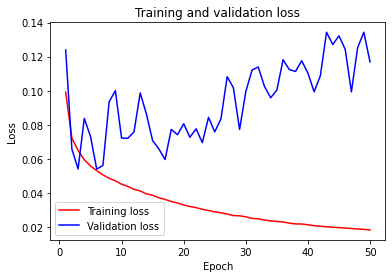

In [ ]:
loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']
epochs1 = range(1, len(loss1) + 1)
plt.figure()
plt.plot(epochs1, loss1, 'r', label='Training loss')
plt.plot(epochs1, val_loss1, 'b', label='Validation loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title('Training and validation loss')
plt.legend()
images_dir = "drive/MyDrive/Engineer's Project/figures"
plt.savefig(f"{images_dir}/training_validation_without_dropout.png")


In [ ]:

plt.show()

<Figure size 432x288 with 0 Axes>

Model 2 - 128 LSTM

In [ ]:
model2 = tf.keras.models.Sequential()
model2.add(layers.LSTM(128,
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model2.add(layers.Dense(1))
model2.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history2 = model2.fit(train_gen,
  steps_per_epoch=200,
  epochs=50,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/50
200/200 [==============================] - 37s 172ms/step - loss: 0.0987 - val_loss: 0.0939
Epoch 2/50
200/200 [==============================] - 34s 171ms/step - loss: 0.0805 - val_loss: 0.1410
Epoch 3/50
200/200 [==============================] - 36s 181ms/step - loss: 0.0750 - val_loss: 0.1219
Epoch 4/50
200/200 [==============================] - 34s 173ms/step - loss: 0.0709 - val_loss: 0.1770
Epoch 5/50
200/200 [==============================] - 35s 174ms/step - loss: 0.0672 - val_loss: 0.1894
Epoch 6/50
200/200 [==============================] - 35s 174ms/step - loss: 0.0639 - val_loss: 0.2011
Epoch 7/50
200/200 [==============================] - 35s 174ms/step - loss: 0.0611 - val_loss: 0.1696
Epoch 8/50
200/200 [==============================] - 35s 173ms/step - loss: 0.0590 - val_loss: 0.1825
Epoch 9/50
200/200 [==============================] - 34s 172ms/step - loss: 0.0564 - val_loss: 0.1904
Epoch 10/50
200/200 [==============================] - 34s 172ms/step - l

In [ ]:
eval2 = model2.evaluate(val_gen, steps = val_steps)
eval2 *std[3]

469/469 [==============================] - 17s 36ms/step - loss: 0.2201


0.08219456131366343

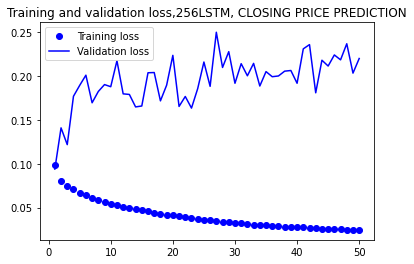

In [ ]:
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']
epochs2 = range(1, len(loss2) + 1)
plt.figure()
plt.plot(epochs2, loss2, 'bo', label='Training loss')
plt.plot(epochs2, val_loss2, 'b', label='Validation loss')
plt.title('Training and validation loss,256LSTM, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model from previous notebook, with dropout value of 0.2

In [ ]:
model3 = tf.keras.models.Sequential()
model3.add(layers.LSTM(11,
  #dropout=0.2,
  #recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model3.add(layers.Dense(5))
model3.add(layers.Dense(1))
model3.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history3 = model3.fit(train_gen,
  steps_per_epoch=200,
  epochs=50,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/50
200/200 [==============================] - 9s 30ms/step - loss: 0.2066 - val_loss: 0.1490
Epoch 2/50
200/200 [==============================] - 6s 28ms/step - loss: 0.0503 - val_loss: 0.1516
Epoch 3/50
200/200 [==============================] - 6s 28ms/step - loss: 0.0446 - val_loss: 0.1358
Epoch 4/50
200/200 [==============================] - 6s 28ms/step - loss: 0.0423 - val_loss: 0.1317
Epoch 5/50
200/200 [==============================] - 6s 28ms/step - loss: 0.0404 - val_loss: 0.1499
Epoch 6/50
200/200 [==============================] - 6s 28ms/step - loss: 0.0400 - val_loss: 0.1154
Epoch 7/50
200/200 [==============================] - 7s 36ms/step - loss: 0.0387 - val_loss: 0.1008
Epoch 8/50
200/200 [==============================] - 8s 38ms/step - loss: 0.0379 - val_loss: 0.0968
Epoch 9/50
200/200 [==============================] - 6s 28ms/step - loss: 0.0376 - val_loss: 0.1156
Epoch 10/50
200/200 [==============================] - 6s 28ms/step - loss: 0.0368 - val_lo

In [ ]:
eval3 = model3.evaluate(val_gen, steps = val_steps)
eval3 *std[3]

484/484 [==============================] - 4s 8ms/step - loss: 0.0983


0.03669943074960558

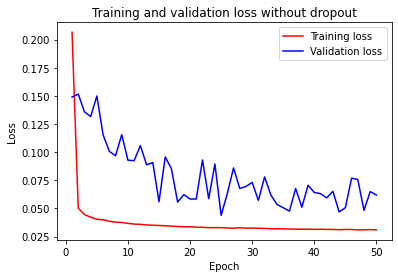

In [ ]:
loss3 = history3.history['loss']
val_loss3 = history3.history['val_loss']
epochs3 = range(1, len(loss3) + 1)
plt.figure()
plt.plot(epochs3, loss3, 'r', label='Training loss')
plt.plot(epochs3, val_loss3, 'b', label='Validation loss')
plt.title('Training and validation loss without dropout')
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Loss")
images_dir = "drive/MyDrive/Engineer's Project/figures"
plt.savefig(f"{images_dir}/training_validation_without_dropout.png")
plt.show()

Same with dropout value of 0.3

In [ ]:
model4 = tf.keras.models.Sequential()
model4.add(layers.LSTM(11,
  dropout=0.3,
  recurrent_dropout=0.3,
  input_shape=(None, float_data.shape[-1])))
model4.add(layers.Dense(5))
model4.add(layers.Dense(1))
model4.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history4 = model4.fit(train_gen,
  steps_per_epoch=200,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
200/200 [==============================] - 12s 47ms/step - loss: 0.2142 - val_loss: 0.4623
Epoch 2/200
200/200 [==============================] - 9s 45ms/step - loss: 0.1126 - val_loss: 0.3892
Epoch 3/200
200/200 [==============================] - 9s 45ms/step - loss: 0.1024 - val_loss: 0.3795
Epoch 4/200
200/200 [==============================] - 9s 46ms/step - loss: 0.0968 - val_loss: 0.3562
Epoch 5/200
200/200 [==============================] - 9s 46ms/step - loss: 0.0931 - val_loss: 0.3816
Epoch 6/200
200/200 [==============================] - 10s 49ms/step - loss: 0.0893 - val_loss: 0.3520
Epoch 7/200
200/200 [==============================] - 10s 51ms/step - loss: 0.0873 - val_loss: 0.3244
Epoch 8/200
200/200 [==============================] - 10s 50ms/step - loss: 0.0853 - val_loss: 0.2861
Epoch 9/200
200/200 [==============================] - 9s 45ms/step - loss: 0.0846 - val_loss: 0.3033
Epoch 10/200
200/200 [==============================] - 9s 45ms/step - loss: 0

In [ ]:
eval4 = model4.evaluate(val_gen, steps = val_steps)
eval4 *std[3]

469/469 [==============================] - 4s 8ms/step - loss: 0.2592


0.09679565836704018

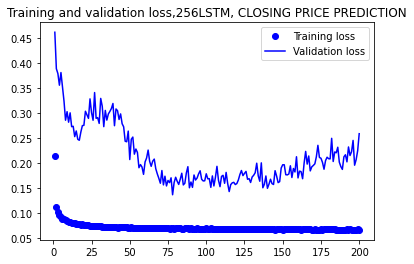

In [ ]:
loss4 = history4.history['loss']
val_loss4 = history4.history['val_loss']
epochs4 = range(1, len(loss4) + 1)
plt.figure()
plt.plot(epochs4, loss4, 'bo', label='Training loss')
plt.plot(epochs4, val_loss4, 'b', label='Validation loss')
plt.title('Training and validation loss,256LSTM, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Model 5 - dropout 0.5

In [ ]:
model5 = tf.keras.models.Sequential()
model5.add(layers.LSTM(11,
  dropout=0.5,
  recurrent_dropout=0.5,
  input_shape=(None, float_data.shape[-1])))
model5.add(layers.Dense(5))
model5.add(layers.Dense(1))
model5.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history5 = model5.fit(train_gen,
  steps_per_epoch=200,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
200/200 [==============================] - 12s 48ms/step - loss: 0.2866 - val_loss: 0.2645
Epoch 2/200
200/200 [==============================] - 9s 48ms/step - loss: 0.1473 - val_loss: 0.3094
Epoch 3/200
200/200 [==============================] - 9s 46ms/step - loss: 0.1276 - val_loss: 0.2575
Epoch 4/200
200/200 [==============================] - 9s 46ms/step - loss: 0.1173 - val_loss: 0.2962
Epoch 5/200
200/200 [==============================] - 10s 49ms/step - loss: 0.1127 - val_loss: 0.3102
Epoch 6/200
200/200 [==============================] - 9s 46ms/step - loss: 0.1070 - val_loss: 0.2593
Epoch 7/200
200/200 [==============================] - 10s 48ms/step - loss: 0.1042 - val_loss: 0.3147
Epoch 8/200
200/200 [==============================] - 9s 46ms/step - loss: 0.1015 - val_loss: 0.2772
Epoch 9/200
200/200 [==============================] - 9s 45ms/step - loss: 0.0987 - val_loss: 0.2790
Epoch 10/200
200/200 [==============================] - 10s 49ms/step - loss: 0

In [ ]:
eval5 = model5.evaluate(val_gen, steps = val_steps)
eval5 *std[3]

469/469 [==============================] - 5s 11ms/step - loss: 0.3913


0.14611031195658786

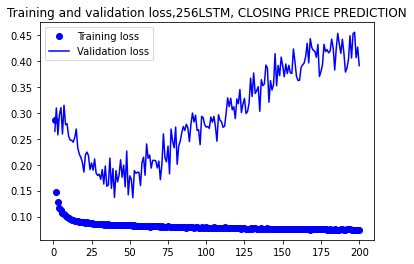

In [ ]:
loss5 = history5.history['loss']
val_loss5 = history5.history['val_loss']
epochs5 = range(1, len(loss5) + 1)
plt.figure()
plt.plot(epochs5, loss5, 'bo', label='Training loss')
plt.plot(epochs5, val_loss5, 'b', label='Validation loss')
plt.title('Training and validation loss,256LSTM, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Model 6 - default, dropout 0.1, later test steps per epoch parameter with value of 2470

In [ ]:
model6 = tf.keras.models.Sequential()
model6.add(layers.LSTM(11,
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model6.add(layers.Dense(5))
model6.add(layers.Dense(1))
model6.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history6 = model6.fit(train_gen,
  steps_per_epoch=200,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
200/200 [==============================] - 12s 48ms/step - loss: 0.2423 - val_loss: 0.2706
Epoch 2/200
200/200 [==============================] - 9s 46ms/step - loss: 0.0892 - val_loss: 0.2466
Epoch 3/200
200/200 [==============================] - 9s 46ms/step - loss: 0.0803 - val_loss: 0.2112
Epoch 4/200
200/200 [==============================] - 9s 46ms/step - loss: 0.0761 - val_loss: 0.2304
Epoch 5/200
200/200 [==============================] - 9s 46ms/step - loss: 0.0744 - val_loss: 0.2051
Epoch 6/200
200/200 [==============================] - 10s 48ms/step - loss: 0.0730 - val_loss: 0.2087
Epoch 7/200
200/200 [==============================] - 9s 45ms/step - loss: 0.0713 - val_loss: 0.2331
Epoch 8/200
200/200 [==============================] - 9s 45ms/step - loss: 0.0702 - val_loss: 0.2320
Epoch 9/200
200/200 [==============================] - 9s 45ms/step - loss: 0.0692 - val_loss: 0.2451
Epoch 10/200
200/200 [==============================] - 11s 53ms/step - loss: 0.

In [ ]:
eval6 = model6.evaluate(val_gen, steps = val_steps)
eval6 *std[3]

469/469 [==============================] - 4s 8ms/step - loss: 0.2315


0.08642596398256996

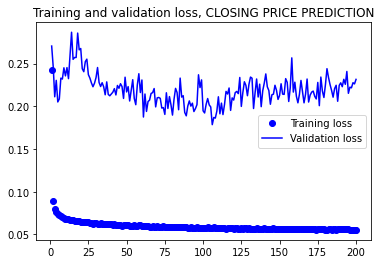

In [ ]:
loss6 = history6.history['loss']
val_loss6 = history6.history['val_loss']
epochs6 = range(1, len(loss6) + 1)
plt.figure()
plt.plot(epochs6, loss6, 'bo', label='Training loss')
plt.plot(epochs6, val_loss6, 'b', label='Validation loss')
plt.title('Training and validation loss, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Model 7, default, with steps per epoch = 2470
---



---



In [ ]:
model7 = tf.keras.models.Sequential()
model7.add(layers.LSTM(11,
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model7.add(layers.Dense(5))
model7.add(layers.Dense(1))
model7.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history7 = model7.fit(train_gen,
  steps_per_epoch=2470,
  epochs=30,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/30
2470/2470 [==============================] - 83s 32ms/step - loss: 0.0831 - val_loss: 0.2679
Epoch 2/30
2470/2470 [==============================] - 79s 32ms/step - loss: 0.0667 - val_loss: 0.2943
Epoch 3/30
2470/2470 [==============================] - 78s 32ms/step - loss: 0.0637 - val_loss: 0.2730
Epoch 4/30
2470/2470 [==============================] - 81s 33ms/step - loss: 0.0623 - val_loss: 0.2256
Epoch 5/30
2470/2470 [==============================] - 78s 32ms/step - loss: 0.0609 - val_loss: 0.1969
Epoch 6/30
2470/2470 [==============================] - 77s 31ms/step - loss: 0.0598 - val_loss: 0.2382
Epoch 7/30
2470/2470 [==============================] - 78s 31ms/step - loss: 0.0593 - val_loss: 0.2350
Epoch 8/30
2470/2470 [==============================] - 78s 32ms/step - loss: 0.0588 - val_loss: 0.2478
Epoch 9/30
2470/2470 [==============================] - 78s 31ms/step - loss: 0.0582 - val_loss: 0.2547
Epoch 10/30
2470/2470 [==============================] - 79s 32m

In [ ]:
eval7 = model7.evaluate(val_gen, steps = val_steps)
eval7 *std[3]

469/469 [==============================] - 4s 8ms/step - loss: 0.2822


0.1053630019961016

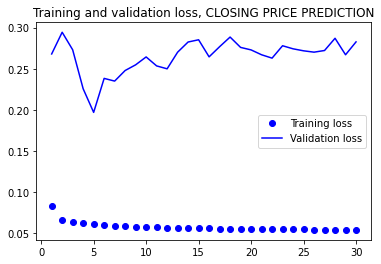

In [ ]:
loss7 = history7.history['loss']
val_loss7 = history7.history['val_loss']
epochs7 = range(1, len(loss7) + 1)
plt.figure()
plt.plot(epochs7, loss7, 'bo', label='Training loss')
plt.plot(epochs7, val_loss7, 'b', label='Validation loss')
plt.title('Training and validation loss, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Different parameters

In [ ]:
model8 = tf.keras.models.Sequential()
model8.add(layers.LSTM(11,
  dropout=0.1,
  recurrent_dropout=0.1,
  input_shape=(None, float_data.shape[-1])))
model8.add(layers.Dense(5))
model8.add(layers.Dense(1))
model8.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history8 = model8.fit(train_gen,
  steps_per_epoch=500,
  epochs=40,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/40
500/500 [==============================] - 21s 37ms/step - loss: 0.1606 - val_loss: 0.3155
Epoch 2/40
500/500 [==============================] - 18s 37ms/step - loss: 0.0775 - val_loss: 0.2420
Epoch 3/40
500/500 [==============================] - 18s 36ms/step - loss: 0.0732 - val_loss: 0.2437
Epoch 4/40
500/500 [==============================] - 20s 40ms/step - loss: 0.0709 - val_loss: 0.2412
Epoch 5/40
500/500 [==============================] - 19s 39ms/step - loss: 0.0688 - val_loss: 0.2341
Epoch 6/40
500/500 [==============================] - 18s 37ms/step - loss: 0.0676 - val_loss: 0.2535
Epoch 7/40
500/500 [==============================] - 18s 36ms/step - loss: 0.0665 - val_loss: 0.2486
Epoch 8/40
500/500 [==============================] - 18s 36ms/step - loss: 0.0654 - val_loss: 0.2027
Epoch 9/40
500/500 [==============================] - 18s 37ms/step - loss: 0.0647 - val_loss: 0.2157
Epoch 10/40
500/500 [==============================] - 18s 36ms/step - loss: 0.064

In [ ]:
eval8 = model8.evaluate(val_gen, steps = val_steps)
eval8 *std[3]

469/469 [==============================] - 4s 8ms/step - loss: 0.3061


0.1143100731227431

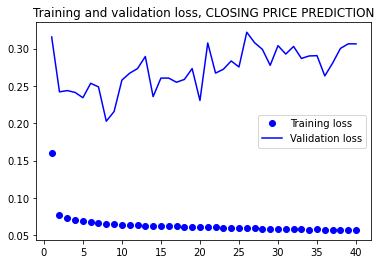

In [ ]:
loss8 = history8.history['loss']
val_loss8 = history8.history['val_loss']
epochs8 = range(1, len(loss8) + 1)
plt.figure()
plt.plot(epochs8, loss8, 'bo', label='Training loss')
plt.plot(epochs8, val_loss8, 'b', label='Validation loss')
plt.title('Training and validation loss, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Best model <br>
lookback = 15 <br>
step = 1 <br>
delay = 1 <br>
min_index  = 0 <br>
max_index = 2500 <br>
batch_size = 128 <br>

In [ ]:
model9 = tf.keras.models.Sequential()
model9.add(layers.LSTM(11,
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model9.add(layers.Dense(5))
model9.add(layers.Dense(1))
model9.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history9 = model9.fit(train_gen,
  steps_per_epoch=200,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
200/200 [==============================] - 14s 37ms/step - loss: 0.1965 - val_loss: 0.2148
Epoch 2/200
200/200 [==============================] - 6s 29ms/step - loss: 0.1044 - val_loss: 0.1756
Epoch 3/200
200/200 [==============================] - 6s 31ms/step - loss: 0.0934 - val_loss: 0.1433
Epoch 4/200
200/200 [==============================] - 6s 30ms/step - loss: 0.0886 - val_loss: 0.1536
Epoch 5/200
200/200 [==============================] - 6s 30ms/step - loss: 0.0860 - val_loss: 0.1292
Epoch 6/200
200/200 [==============================] - 6s 30ms/step - loss: 0.0836 - val_loss: 0.1181
Epoch 7/200
200/200 [==============================] - 6s 29ms/step - loss: 0.0814 - val_loss: 0.1216
Epoch 8/200
200/200 [==============================] - 6s 29ms/step - loss: 0.0808 - val_loss: 0.1437
Epoch 9/200
200/200 [==============================] - 6s 30ms/step - loss: 0.0792 - val_loss: 0.1231
Epoch 10/200
200/200 [==============================] - 6s 29ms/step - loss: 0.07

In [ ]:
eval9 = model9.evaluate(val_gen, steps = val_steps)
eval9 *std[3]

484/484 [==============================] - 3s 6ms/step - loss: 0.1371


0.05118387368624999

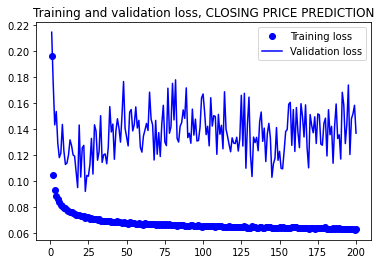

In [ ]:
loss9 = history9.history['loss']
val_loss9 = history9.history['val_loss']
epochs9 = range(1, len(loss9) + 1)
plt.figure()
plt.plot(epochs9, loss9, 'bo', label='Training loss')
plt.plot(epochs9, val_loss9, 'b', label='Validation loss')
plt.title('Training and validation loss, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

In [ ]:
model10 = tf.keras.models.Sequential()
model10.add(layers.LSTM(11,
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model10.add(layers.Dense(5))
model10.add(layers.Dense(1))
model10.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history10 = model10.fit(train_gen,
  steps_per_epoch=200,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
200/200 [==============================] - 8s 25ms/step - loss: 0.1882 - val_loss: 0.1266
Epoch 2/200
200/200 [==============================] - 4s 22ms/step - loss: 0.1092 - val_loss: 0.1061
Epoch 3/200
200/200 [==============================] - 5s 23ms/step - loss: 0.0971 - val_loss: 0.1462
Epoch 4/200
200/200 [==============================] - 4s 22ms/step - loss: 0.0907 - val_loss: 0.1394
Epoch 5/200
200/200 [==============================] - 5s 24ms/step - loss: 0.0874 - val_loss: 0.1486
Epoch 6/200
200/200 [==============================] - 5s 24ms/step - loss: 0.0852 - val_loss: 0.1411
Epoch 7/200
200/200 [==============================] - 5s 23ms/step - loss: 0.0838 - val_loss: 0.1555
Epoch 8/200
200/200 [==============================] - 5s 23ms/step - loss: 0.0815 - val_loss: 0.1321
Epoch 9/200
200/200 [==============================] - 4s 21ms/step - loss: 0.0802 - val_loss: 0.1218
Epoch 10/200
200/200 [==============================] - 4s 21ms/step - loss: 0.079

In [ ]:
eval10 = model10.evaluate(val_gen, steps = val_steps)
eval10 *std[3]

492/492 [==============================] - 4s 8ms/step - loss: 0.1889


0.07052603930911117

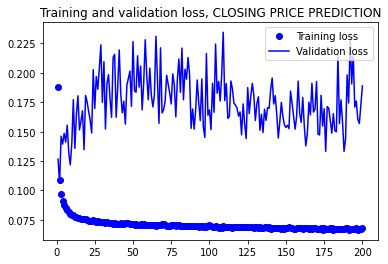

In [ ]:
loss10 = history10.history['loss']
val_loss10 = history10.history['val_loss']
epochs10 = range(1, len(loss10) + 1)
plt.figure()
plt.plot(epochs10, loss10, 'bo', label='Training loss')
plt.plot(epochs10, val_loss10, 'b', label='Validation loss')
plt.title('Training and validation loss, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

batch size = 64

In [ ]:
model11 = tf.keras.models.Sequential()
model11.add(layers.LSTM(11,
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model11.add(layers.Dense(5))
model11.add(layers.Dense(1))
model11.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history11 = model11.fit(train_gen,
  steps_per_epoch=200,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
200/200 [==============================] - 16s 45ms/step - loss: 0.1868 - val_loss: 0.5424
Epoch 2/200
200/200 [==============================] - 6s 30ms/step - loss: 0.1105 - val_loss: 0.5378
Epoch 3/200
200/200 [==============================] - 5s 25ms/step - loss: 0.0990 - val_loss: 0.5115
Epoch 4/200
200/200 [==============================] - 5s 25ms/step - loss: 0.0928 - val_loss: 0.5048
Epoch 5/200
200/200 [==============================] - 6s 28ms/step - loss: 0.0898 - val_loss: 0.4913
Epoch 6/200
200/200 [==============================] - 5s 26ms/step - loss: 0.0869 - val_loss: 0.4561
Epoch 7/200
200/200 [==============================] - 5s 26ms/step - loss: 0.0842 - val_loss: 0.4638
Epoch 8/200
200/200 [==============================] - 6s 29ms/step - loss: 0.0826 - val_loss: 0.4366
Epoch 9/200
200/200 [==============================] - 5s 26ms/step - loss: 0.0812 - val_loss: 0.4437
Epoch 10/200
200/200 [==============================] - 5s 26ms/step - loss: 0.07

In [ ]:
eval11 = model11.evaluate(val_gen, steps = val_steps)
eval11 *std[3]

484/484 [==============================] - 5s 10ms/step - loss: 0.2908


0.10858399211448422

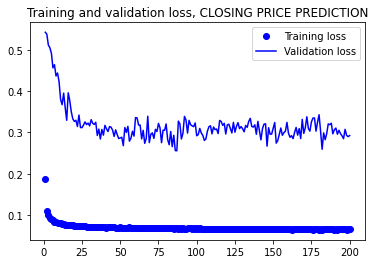

In [ ]:
loss11 = history11.history['loss']
val_loss11 = history11.history['val_loss']
epochs11 = range(1, len(loss11) + 1)
plt.figure()
plt.plot(epochs11, loss11, 'bo', label='Training loss')
plt.plot(epochs11, val_loss11, 'b', label='Validation loss')
plt.title('Training and validation loss, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()

Model lookback = 15, batch = 256

In [ ]:
model12 = tf.keras.models.Sequential()
model12.add(layers.LSTM(11,
  dropout=0.2,
  recurrent_dropout=0.2,
  input_shape=(None, float_data.shape[-1])))
model12.add(layers.Dense(5))
model12.add(layers.Dense(1))
model12.compile(optimizer= tf.keras.optimizers.RMSprop(), loss='mae')
history12 = model12.fit(train_gen,
  steps_per_epoch=200,
  epochs=200,
  validation_data=val_gen,
  validation_steps=val_steps)

Epoch 1/200
200/200 [==============================] - 13s 50ms/step - loss: 0.2284 - val_loss: 0.0985
Epoch 2/200
200/200 [==============================] - 10s 48ms/step - loss: 0.0978 - val_loss: 0.1162
Epoch 3/200
200/200 [==============================] - 9s 45ms/step - loss: 0.0886 - val_loss: 0.1390
Epoch 4/200
200/200 [==============================] - 9s 47ms/step - loss: 0.0841 - val_loss: 0.1207
Epoch 5/200
200/200 [==============================] - 10s 48ms/step - loss: 0.0818 - val_loss: 0.1117
Epoch 6/200
200/200 [==============================] - 9s 47ms/step - loss: 0.0803 - val_loss: 0.1397
Epoch 7/200
200/200 [==============================] - 8s 41ms/step - loss: 0.0783 - val_loss: 0.1651
Epoch 8/200
200/200 [==============================] - 8s 42ms/step - loss: 0.0778 - val_loss: 0.1074
Epoch 9/200
200/200 [==============================] - 8s 40ms/step - loss: 0.0767 - val_loss: 0.1455
Epoch 10/200
200/200 [==============================] - 9s 47ms/step - loss: 0.

In [ ]:
eval12 = model12.evaluate(val_gen, steps = val_steps)
eval12 *std[3]

484/484 [==============================] - 7s 15ms/step - loss: 0.2185


0.08158515893923912

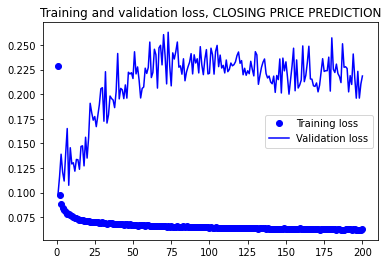

In [ ]:
loss12 = history12.history['loss']
val_loss12 = history12.history['val_loss']
epochs12 = range(1, len(loss12) + 1)
plt.figure()
plt.plot(epochs12, loss12, 'bo', label='Training loss')
plt.plot(epochs12, val_loss12, 'b', label='Validation loss')
plt.title('Training and validation loss, CLOSING PRICE PREDICTION')
plt.legend()
plt.show()